<a href="https://colab.research.google.com/github/festeban11/Minor-Machine-Learning/blob/main/ProyectoFinal-HumanActivityRecognition-Entrega05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final – Human Activity Recognition

**Nombre:** Fernando Ibacache Carrión

**1. Problema:** Clasificar actividades humanas a partir de datos 
provenientes de sensores.

**2. Hipótesis:** Es posible reconocer la actividad humana a partir de sensores con métricas de rendimiento superior de 95%.

**3. Solución:** Se propone una investigación e implementación de tres modelos de clasificación; Support Vector Machine (SVM), Random Forest y Extreme Gradient Boosting (XGBoost). Todos los modelos usarán las mismas validaciones, en problemas de clasificación las métricas de rendimiento más utilizadas son: Accuracy (ACC), Precision (P), Recall (R), F1 score(F1) y Area Under Crurve (AUC).

###Entrega 01 - OBTAIN

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
columns = ['user','activity','timestamp', 'x-accel', 'y-accel', 'z-accel']
df = pd.read_csv('drive/MyDrive/WISDM_at_v2.0_raw.txt', header = None, names = columns, low_memory=False)
df.head()

,user,activity,timestamp,x-accel,y-accel,z-accel
0,1679,Walking,1370520469556,0.294132,-0.635605,-0.22693644;
1,1679,Walking,1370520469606,-0.499688,-0.604451,-0.22602014;
2,1679,Walking,1370520469656,-2.178345,0.713491,0.37201694;
3,1679,Walking,1370520469706,-2.797763,1.354899,-0.27763826;
4,1679,Walking,1370520469756,-2.167961,-1.327716,-0.5549711;


*   user: código asignado al usuario
*   activity: actividad realizada (Walking, Jogging, Sitting, Standing,Upstairs, Downstairs)
* timestamp: marca de tiempo (tiempo en milisegundos a través del tiempo unix)
* x-accel: aceleración en la dirección x medida por el acelerómetro del teléfono android en m/(s^2).
* y-accel: aceleración en la dirección y medida por el acelerómetro del teléfono android en m/(s^2).
* z-accel: aceleración en la dirección z medida por el acelerómetro del teléfono android en m/(s^2).



In [ ]:
df.shape

(3005411, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005411 entries, 0 to 3005410
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-accel    float64
 4   y-accel    float64
 5   z-accel    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 137.6+ MB


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes



In [ ]:
#Se revisa si existen datos faltantes con la funcion isnull()
df.isnull().sum()

user             0
activity     24646
timestamp        0
x-accel      24646
y-accel      24646
z-accel      24646
dtype: int64

In [ ]:
#Se eliminan las filas con datos faltantes usando la funcion dropna()
df=df.dropna()

Agregar al DataFrame los nombres de las columnas \\
**Se realizó en la etapa OBTAIN**

Visualizar las 5 primeras filas del DataFrame

In [ ]:
df.head()

,user,activity,timestamp,x-accel,y-accel,z-accel
0,1679,Walking,1370520469556,0.294132,-0.635605,-0.22693644;
1,1679,Walking,1370520469606,-0.499688,-0.604451,-0.22602014;
2,1679,Walking,1370520469656,-2.178345,0.713491,0.37201694;
3,1679,Walking,1370520469706,-2.797763,1.354899,-0.27763826;
4,1679,Walking,1370520469756,-2.167961,-1.327716,-0.5549711;


Buscar datos nulos y eliminarlos si es que existen

In [ ]:
df.isnull().sum()

user         0
activity     0
timestamp    0
x-accel      0
y-accel      0
z-accel      0
dtype: int64

Visualizar los tipo de datos a los que pertenece cada columna (.info())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980765 entries, 0 to 3005410
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-accel    float64
 4   y-accel    float64
 5   z-accel    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.2+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación

In [ ]:
#Se observo que la columna z-accel tiene datos de tipo object.
#Los valores de la columna z-accel contienen el simbolo de punto y coma.
#Se eliminara el simbolo punto y coma de cada valor usando la funcion split, 
#luego seran agregados nuevamente al dataframe

columnZ = df['z-accel']
zValuesClen = []
for zValues in columnZ:
  zValuesClen.append(str(zValues).split(';')[0])
df['z-accel']=zValuesClen
df['z-accel']

0          -0.22693644
1          -0.22602014
2           0.37201694
3          -0.27763826
4           -0.5549711
              ...     
3005406      3.1362782
3005407       9.152567
3005408      10.953622
3005409       5.588778
3005410    -0.23590942
Name: z-accel, Length: 2980765, dtype: object

In [ ]:
#Se convierten los valores de la columna z-accel a float
df['z-accel'] = df['z-accel'].astype('float')

Imprimir los tipos de datos de las variables del DataFrame

In [ ]:
df.info()
dfToExplore = df.copy()
dfToExplore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980765 entries, 0 to 3005410
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-accel    float64
 4   y-accel    float64
 5   z-accel    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 159.2+ MB


,user,activity,timestamp,x-accel,y-accel,z-accel
0,1679,Walking,1370520469556,0.294132,-0.635605,-0.226936
1,1679,Walking,1370520469606,-0.499688,-0.604451,-0.226020
2,1679,Walking,1370520469656,-2.178345,0.713491,0.372017
3,1679,Walking,1370520469706,-2.797763,1.354899,-0.277638
4,1679,Walking,1370520469756,-2.167961,-1.327716,-0.554971
...,...,...,...,...,...,...
3005406,657,Walking,1316116428262,2.559677,-6.112090,3.136278
3005407,657,Walking,1316116428312,6.161787,-4.962480,9.152567
3005408,657,Walking,1316116428367,1.295107,-11.975098,10.953622
3005409,657,Walking,1316116428412,7.464677,-16.650175,5.588778


Eliminar las columnas que no se utilizaran para la clasificación

In [ ]:
#No se usaran las columnas 'user y 'timestamp'
df = df.drop(['user', 'timestamp'], axis = 1).copy()
df.head()

,activity,x-accel,y-accel,z-accel
0,Walking,0.294132,-0.635605,-0.226936
1,Walking,-0.499688,-0.604451,-0.226020
2,Walking,-2.178345,0.713491,0.372017
3,Walking,-2.797763,1.354899,-0.277638
4,Walking,-2.167961,-1.327716,-0.554971


Utilizar el comando value_counts para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar

In [ ]:
df['activity'].value_counts()

Walking      1255923
Sitting       663706
Jogging       438871
Standing      288873
LyingDown     275967
Stairs         57425
Name: activity, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias.

In [ ]:
#Se utiliza la actividad "Stairs" debido que tiene el menor números de instancias en comparacion a las demas actividades
Walking = df[df['activity']=='Walking'].head(57425).copy()
Sitting = df[df['activity']=='Sitting'].head(57425).copy()
Jogging = df[df['activity']=='Jogging'].head(57425).copy()
Standing  = df[df['activity']=='Standing'].head(57425).copy()
LyingDown = df[df['activity']=='LyingDown'].head(57425).copy()
Stairs = df[df['activity']=='Stairs'].copy()
balancedDf = pd.DataFrame()
balancedDf = balancedDf.append([Walking, Sitting, Jogging, Standing, LyingDown, Stairs])

Establecer el número de instancias y dimensiones del data frame resultante (shape)

In [ ]:
balancedDf.shape

(344550, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. (value_counts)

In [ ]:
balancedDf['activity'].value_counts()

Walking      57425
Sitting      57425
Jogging      57425
Standing     57425
LyingDown    57425
Stairs       57425
Name: activity, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden (head)

In [ ]:
balancedDf.head()

,activity,x-accel,y-accel,z-accel
0,Walking,0.294132,-0.635605,-0.226936
1,Walking,-0.499688,-0.604451,-0.226020
2,Walking,-2.178345,0.713491,0.372017
3,Walking,-2.797763,1.354899,-0.277638
4,Walking,-2.167961,-1.327716,-0.554971


Separar las variables predictoras (X) de las categorias o etiquetas (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
dfPreprocessed = balancedDf.copy()
label = LabelEncoder()
dfPreprocessed['label'] = label.fit_transform(dfPreprocessed['activity'])
dfPreprocessed.head()

,activity,x-accel,y-accel,z-accel,label
0,Walking,0.294132,-0.635605,-0.226936,5
1,Walking,-0.499688,-0.604451,-0.226020,5
2,Walking,-2.178345,0.713491,0.372017,5
3,Walking,-2.797763,1.354899,-0.277638,5
4,Walking,-2.167961,-1.327716,-0.554971,5


In [ ]:
X = dfPreprocessed[['x-accel', 'y-accel', 'z-accel']]
y = dfPreprocessed['label']


Estandarizar los datos numericos (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)

In [ ]:
scaledX = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaledX['label'] = y.values
scaledX

,x,y,z,label
0,-0.001704,0.001704,-0.001704,5
1,-0.001704,0.001704,-0.001704,5
2,-0.001704,0.001704,-0.001704,5
3,-0.001704,0.001704,-0.001704,5
4,-0.001704,0.001704,-0.001704,5
...,...,...,...,...
344545,-0.001704,0.001704,-0.001704,3
344546,-0.001704,0.001704,-0.001704,3
344547,-0.001704,0.001704,-0.001704,3
344548,-0.001704,0.001704,-0.001704,3


In [ ]:
label.classes_

array(['Jogging', 'LyingDown', 'Sitting', 'Stairs', 'Standing', 'Walking'],
      dtype=object)

###Entrega 03 - EXPLORE

Para realizar la etapa EXPLORE, se utiliza el dataframe dfToExplore, el cual se obtiene después de realizar la limpieza de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Histograma de actividades por usuario

In [ ]:
plt.figure(figsize=(300,100))
plt.title('Histograma de actividades por usuario', fontsize=20)
sns.countplot(x='user',hue='activity', data = dfToExplore)
plt.show()


De acuerdo al histograma de actividades por usuario, los datos se encuentran pseudo-equilibrados, existen usuarios con pocos datos en algunas actividades, mientras que otros, tienen un alto número de entrenamientos.

Instancias por Actividad

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


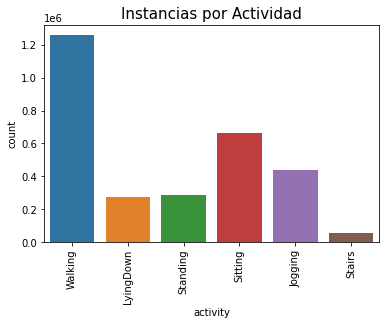

In [ ]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(dfToExplore.activity)
plt.xticks(rotation=90)
plt.show()

Para este caso, se tienen un gran número de intancias para la actividad "Walking" y muy pocos de "Stairs". Se tiene una cantidad de instancias bastante similar entre "LyingDown" y "Standing". Los datos por actividades parecen estar desequilibrados.

Entrenamientos por usuario

In [ ]:
plt.figure(figsize=(300,100))
ax = dfToExplore['user'].value_counts().plot(kind='bar');
ax.set_title("Entrenamientos por usuario")

Text(0.5, 1.0, 'Entrenamientos por usuario')

Se destaca el usuario 1603, que tiene el mayor número de entrenamientos registrados. Por lo que, muchos de los datos deben provenir principalmente de este usuario

Histogramas por ejes 

Eje X

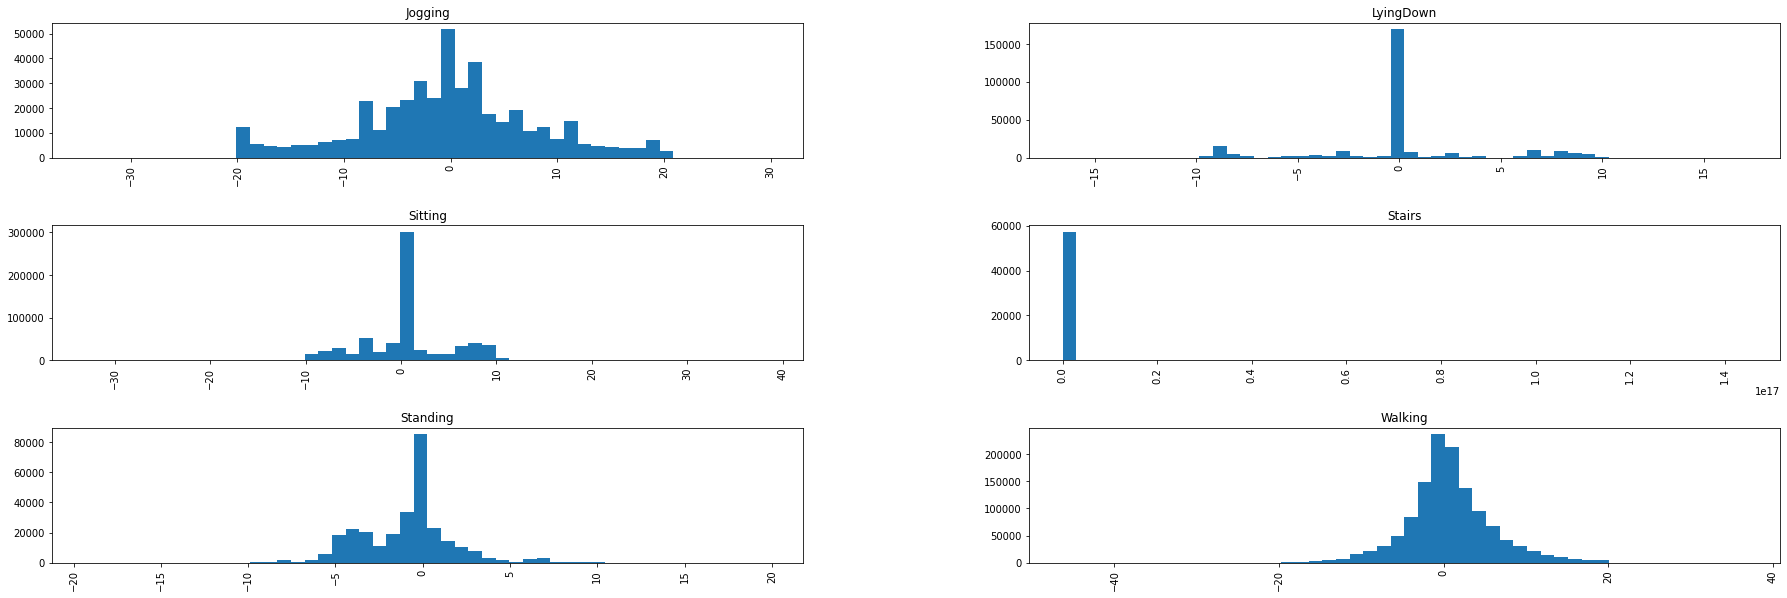

In [ ]:
ax = dfToExplore.hist(column='x-accel', by='activity',bins = 50, figsize = (30, 10))

Para "Jogging" y "Walking" las distribuciones parecen simétricas, incluso se podrian ajustar a una distribucion normal. Para "Stairs", la mayoría de los datos son muy cercanos a 0. En "LyingDown" existen muchos datos dispersos

Eje Y

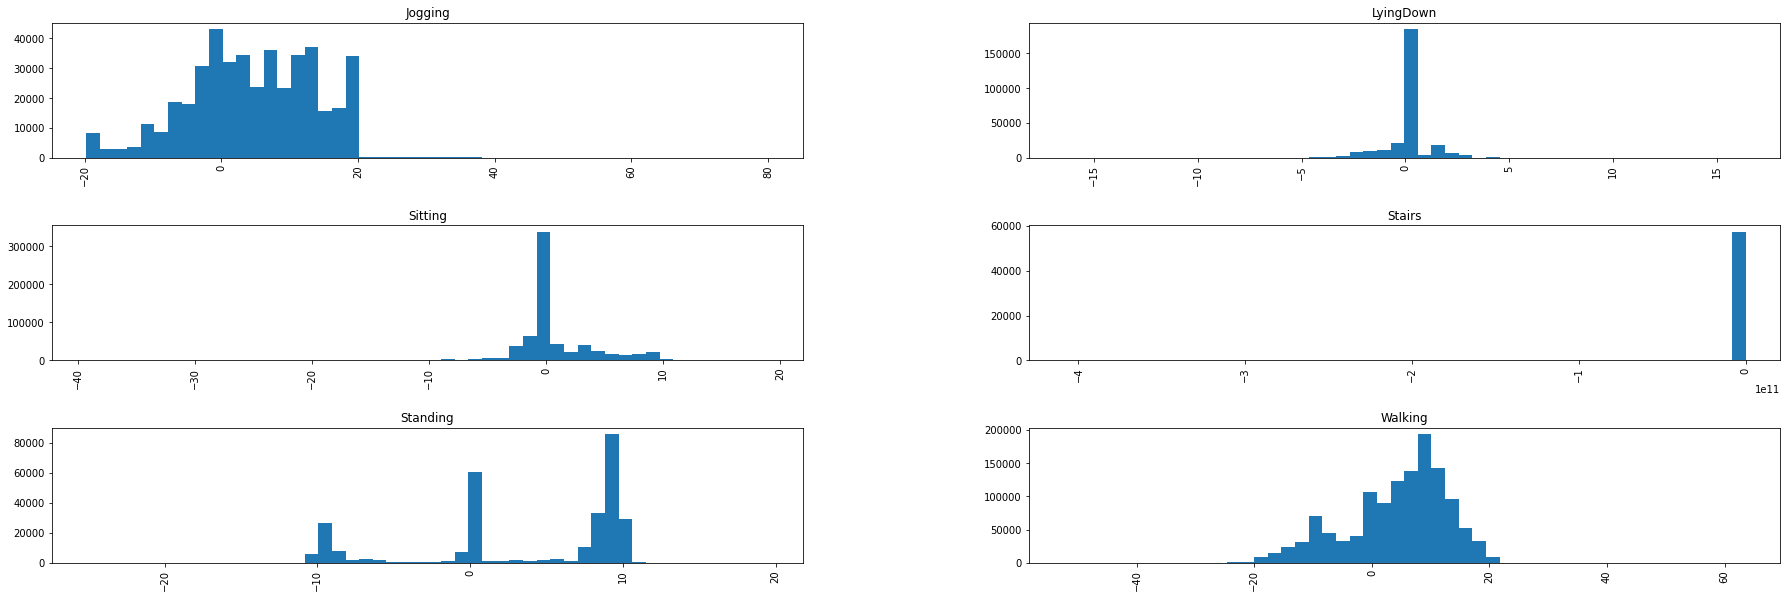

In [ ]:
ax = dfToExplore.hist(column='y-accel', by='activity',bins = 50, figsize = (30, 10))

Ninguna distribución de ajusta a una distribucion normal. En "Jogging", la mayoria de los datos son negativos. En "Walking, existe una mayor cantidad de datos positivos. En "Stading" se concentra una mayor cantidad datos cercanos a 10.

Eje Z

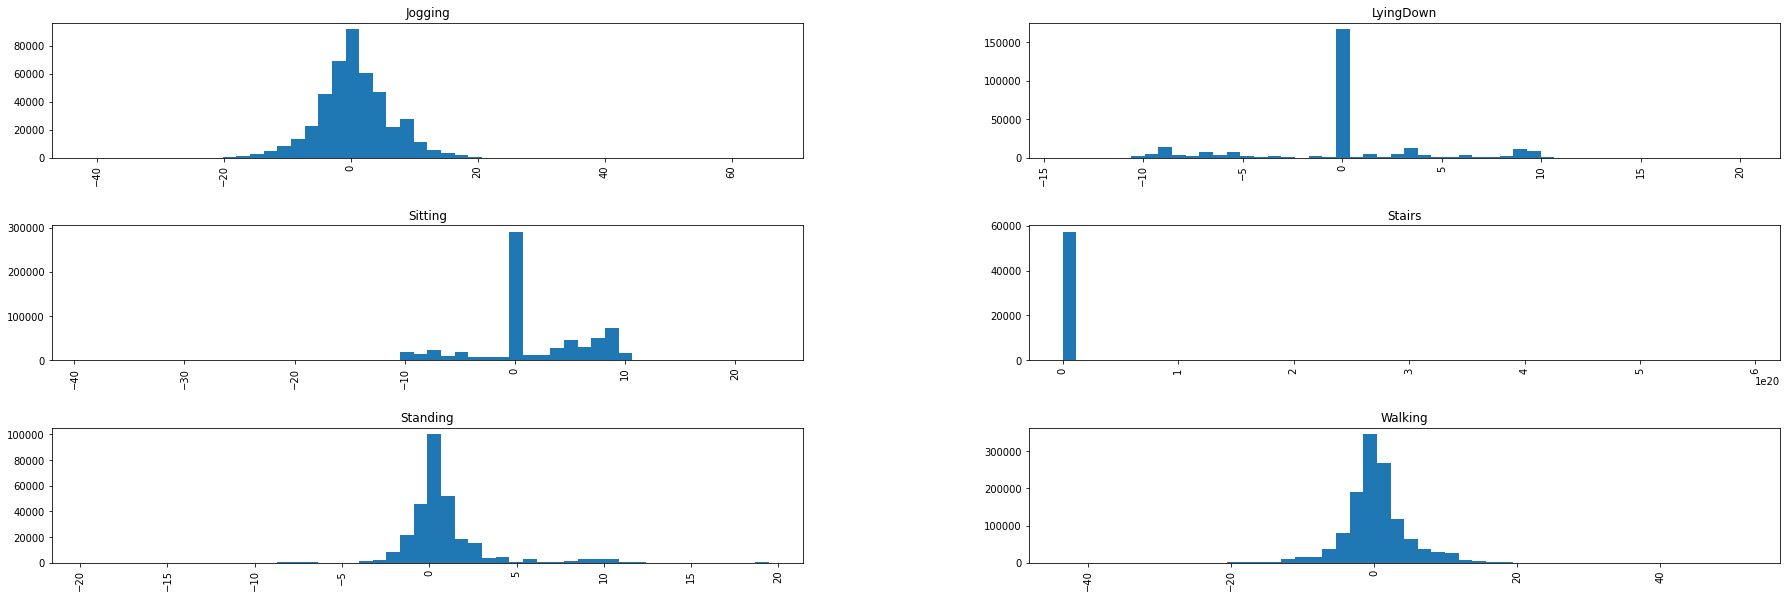

In [ ]:
ax = dfToExplore.hist(column='z-accel', by='activity',bins = 50, figsize = (30, 10))

Para "Jogging", "Walking" y "Standing" las distribuciones parecen simétricas, incluso se podrian ajustar a una distribucion normal. En LyingDown existen muchos datos dispersos

###Entrega 04 - MODEL

Para realizar esta etapa, se usará el dataframe "dfPreprocessed" cuyos datos no están escalados (el conjunto de datos escalados no daban buenos resultados, todas las métricas mostraban ceros)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import xgboost as xgb

**SVM**

In [ ]:
#Separando la matriz en dos partes
#La submatriz 'x_svm' contiene los valores de los ejes del acelerometro 
x_svm=dfPreprocessed.iloc[:,1:4]
x_svm

,x-accel,y-accel,z-accel
0,0.294132,-0.635605,-0.226936
1,-0.499688,-0.604451,-0.226020
2,-2.178345,0.713491,0.372017
3,-2.797763,1.354899,-0.277638
4,-2.167961,-1.327716,-0.554971
...,...,...,...
2709529,-4.466384,3.187880,2.327763
2709530,-4.465784,18.882471,-12.093711
2709531,7.715913,13.093889,-1.974019
2709532,-0.932542,17.576433,-4.082713


In [ ]:
#La submatriz 'y_svm' contiene los valores de la columna 'label' que corresponde a las activades
y_svm=dfPreprocessed.iloc[:,4]
y_svm

0          5
1          5
2          5
3          5
4          5
          ..
2709529    3
2709530    3
2709531    3
2709532    3
2709533    3
Name: label, Length: 344550, dtype: int64

In [ ]:
#dividir en conjunto de entrenamiento y prueba.
#10% datos de entrenamiento 5% datos de test (esto se debe a que el svm es muy lento al procesar gran cantidad de datos)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size = 0.05, train_size = 0.10, random_state=40)

In [ ]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(34455, 3)
(34455,)
(17228, 3)
(17228,)


Entrenamiento y ajuste del modelo

In [ ]:
model = SVC(gamma= 0.001, probability=True)
#gamma = coeficiente para las funciones del kernel
#probability = variable para las probabilidades estimadas

In [ ]:
model.fit(x_train_svm, y_train_svm)

SVC(gamma=0.001, probability=True)

Predicciones del modelo entrenado

In [ ]:
pred_svm = model.predict(x_test_svm)

Evaluacion del modelo, con métricas correspondientes

In [ ]:
print(classification_report(y_test_svm, pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      2862
           1       0.52      0.90      0.66      2806
           2       0.75      0.73      0.74      2897
           3       0.40      0.27      0.32      2935
           4       0.68      0.68      0.68      2957
           5       0.52      0.42      0.47      2771

    accuracy                           0.58     17228
   macro avg       0.58      0.58      0.57     17228
weighted avg       0.58      0.58      0.57     17228



In [ ]:
acc_svm = accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.5829463663803112


In [ ]:
precision_svm = precision_score(y_test_svm, pred_svm, average='macro')
print('The precision of the SVM is:', precision_svm)

The precision of the SVM is: 0.5784729817874998


In [ ]:
recall_svm = recall_score(y_test_svm, pred_svm, average='macro')
print('The recall of the SVM is:', recall_svm)

The recall of the SVM is: 0.5836253772923085


In [ ]:
f1_svm = f1_score(y_test_svm, pred_svm, average='macro')
print('The f1 score of the SVM is:', f1_svm)

The f1 score of the SVM is: 0.5688781365907508


In [ ]:
#Se obtiene una lista que contengan las probabilidades estimadas por el metodo predict_proba 
pred_prob_svm = model.predict_proba(x_test_svm)
#Se calcula el valor de auc
auc_svm = roc_auc_score(y_test_svm, pred_prob_svm, multi_class='ovr', average='macro')
print('The auc score of the SVM is:', auc_svm)

The auc score of the SVM is: 0.8560575372285105


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f674d263f70>)

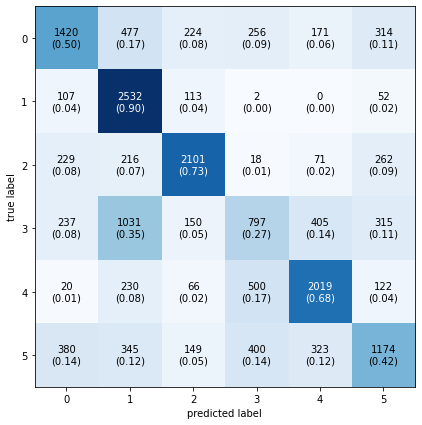

In [ ]:
#Matriz de confusion
cm_svm = confusion_matrix(y_test_svm, pred_svm)
plot_confusion_matrix(conf_mat=cm_svm, show_normed=True, figsize=(7,7))

**Random Forest**

In [ ]:
#Separando la matriz en dos partes
#La submatriz 'x_randomForest' contiene los valores de los ejes del acelerometro 
x_randomForest=dfPreprocessed.iloc[:,1:4]
x_randomForest

,x-accel,y-accel,z-accel
0,0.294132,-0.635605,-0.226936
1,-0.499688,-0.604451,-0.226020
2,-2.178345,0.713491,0.372017
3,-2.797763,1.354899,-0.277638
4,-2.167961,-1.327716,-0.554971
...,...,...,...
2709529,-4.466384,3.187880,2.327763
2709530,-4.465784,18.882471,-12.093711
2709531,7.715913,13.093889,-1.974019
2709532,-0.932542,17.576433,-4.082713


In [ ]:
#La submatriz 'y_randomForest' contiene los valores de la columna 'label' que corresponde a las activades
y_randomForest=dfPreprocessed.iloc[:,4]
y_randomForest

0          5
1          5
2          5
3          5
4          5
          ..
2709529    3
2709530    3
2709531    3
2709532    3
2709533    3
Name: label, Length: 344550, dtype: int64

In [ ]:
#10% datos de entrenamiento 5% datos de test 
x_train_randomForest, x_test_randomForest, y_train_randomForest, y_test_randomForest = train_test_split(x_randomForest, y_randomForest, test_size = 0.05, train_size = 0.10, random_state=40)

In [ ]:
print(x_train_randomForest.shape)
print(y_train_randomForest.shape)
print(x_test_randomForest.shape)
print(y_test_randomForest.shape)

(34455, 3)
(34455,)
(17228, 3)
(17228,)


Entrenamiento y ajuste del modelo

In [ ]:
model=RandomForestClassifier(criterion = 'entropy', max_depth=5, random_state=42)
#criterion = funcion para medir la calidad de un split
#max_depth = profunidad maxima del arbol 
#random_state = controla la aleatoriedad de las muestras utilizadas 
#               al construir el arbol el muestreo de las caracteristicas.

In [ ]:
model.fit(x_train_randomForest, y_train_randomForest)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

Predicciones del modelo entrenado

In [ ]:
pred_randomForest = model.predict(x_test_randomForest)

Evaluacion del modelo, con métricas correspondientes

In [ ]:
print(classification_report(y_test_randomForest, pred_randomForest))

              precision    recall  f1-score   support

           0       0.63      0.51      0.57      2862
           1       0.87      0.95      0.91      2806
           2       0.89      0.84      0.86      2897
           3       0.49      0.58      0.53      2935
           4       0.65      0.76      0.70      2957
           5       0.62      0.50      0.55      2771

    accuracy                           0.69     17228
   macro avg       0.69      0.69      0.69     17228
weighted avg       0.69      0.69      0.69     17228



In [ ]:
acc_rf = accuracy_score(pred_randomForest, y_test_randomForest)
print('The accuracy of the Random Forest is:', acc_rf)

The accuracy of the Random Forest is: 0.6905618760157882


In [ ]:
precision_rf = precision_score(y_test_randomForest, pred_randomForest, average='macro')
print('The precision of the Random Forest is:', precision_rf)

The precision of the Random Forest is: 0.6936829259465612


In [ ]:
recall_rf = recall_score(y_test_randomForest, pred_randomForest, average='macro')
print('The recall of the Random Forest is:', recall_rf)

The recall of the Random Forest is: 0.6901536104587916


In [ ]:
f1_rf = f1_score(y_test_randomForest, pred_randomForest, average='macro')
print('The f1 score of the Random Forest is:', f1_rf)

The f1 score of the Random Forest is: 0.6880561640540511


In [ ]:
#Se obtiene una lista que contengan las probabilidades estimadas por el metodo predict_proba 
pred_prob_rf = model.predict_proba(x_test_randomForest)
auc_rf = roc_auc_score(y_test_randomForest, pred_prob_rf, multi_class='ovr', average='macro')
print('The auc score of the Random Forest is:', auc_rf)

The auc score of the Random Forest is: 0.9270090082701348


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f674deb2e50>)

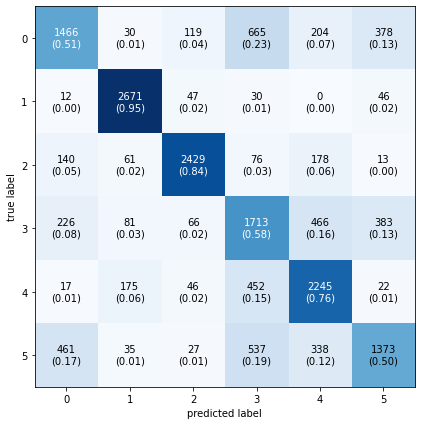

In [ ]:
#Matriz de confusion
cm_rf = confusion_matrix(y_test_randomForest, pred_randomForest)
plot_confusion_matrix(conf_mat=cm_rf, show_normed=True, figsize=(7,7))

**XG Boost**

In [ ]:
#Separando la matriz en dos partes
#La submatriz 'x_boost' contiene los valores de los ejes del acelerometro 
x_boost=dfPreprocessed.iloc[:,1:4]
x_boost

,x-accel,y-accel,z-accel
0,0.294132,-0.635605,-0.226936
1,-0.499688,-0.604451,-0.226020
2,-2.178345,0.713491,0.372017
3,-2.797763,1.354899,-0.277638
4,-2.167961,-1.327716,-0.554971
...,...,...,...
2709529,-4.466384,3.187880,2.327763
2709530,-4.465784,18.882471,-12.093711
2709531,7.715913,13.093889,-1.974019
2709532,-0.932542,17.576433,-4.082713


In [ ]:
#La submatriz 'y_boost' contiene los valores de la columna 'label' que corresponde a las activades
y_boost=dfPreprocessed.iloc[:,4]
y_boost

0          5
1          5
2          5
3          5
4          5
          ..
2709529    3
2709530    3
2709531    3
2709532    3
2709533    3
Name: label, Length: 344550, dtype: int64

In [ ]:
#10% datos de entrenamiento 5% datos de test 
x_train_boost, x_test_boost, y_train_boost, y_test_boost = train_test_split(x_boost, y_boost, test_size = 0.05, train_size = 0.10, random_state=40)

In [ ]:
print(x_train_boost.shape)
print(y_train_boost.shape)
print(x_test_boost.shape)
print(y_test_boost.shape)

(34455, 3)
(34455,)
(17228, 3)
(17228,)


Entrenamiento y ajuste del modelo

In [ ]:
model = xgb.XGBClassifier()
model.fit(x_train_boost, y_train_boost)

XGBClassifier(objective='multi:softprob')

Predicciones del modelo entrenado

In [ ]:
preds_xgb = model.predict(x_test_boost)

Evaluacion del modelo, con métricas correspondientes

In [ ]:
print(classification_report(y_test_boost, preds_xgb))

              precision    recall  f1-score   support

           0       0.71      0.57      0.64      2862
           1       0.92      0.96      0.94      2806
           2       0.90      0.93      0.92      2897
           3       0.61      0.61      0.61      2935
           4       0.82      0.89      0.86      2957
           5       0.59      0.60      0.59      2771

    accuracy                           0.76     17228
   macro avg       0.76      0.76      0.76     17228
weighted avg       0.76      0.76      0.76     17228



In [ ]:
acc_xgb = accuracy_score(preds_xgb , y_test_boost)
print('The accuracy of the XG Boost is:', acc_xgb)

The accuracy of the XG Boost is: 0.7631762247504064


In [ ]:
precision_xgb = precision_score(y_test_boost, preds_xgb, average='macro')
print('The precision of the XG Boost is:', precision_xgb)

The precision of the XG Boost is: 0.7592528879292658


In [ ]:
recall_xgb = recall_score(y_test_boost, preds_xgb,  average='macro')
print('The recall of the XG Boost is:', recall_xgb)

The recall of the XG Boost is: 0.7625433512190383


In [ ]:
f1_xgb = f1_score(y_test_boost, preds_xgb,  average='macro')
print('The f1 score of the XG Boost is:', f1_xgb)

The f1 score of the XG Boost is: 0.7593398086415775


In [ ]:
#Se obtiene una lista que contengan las probabilidades estimadas por el metodo predict_proba 
pred_prob_xgb = model.predict_proba(x_test_boost)
auc_xgb = roc_auc_score(y_test_boost,pred_prob_xgb, multi_class='ovr', average='macro')
print('The auc score of the XG Boost is:', auc_xgb)

The auc score of the XG Boost is: 0.9467799591915679


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f674d6a1040>)

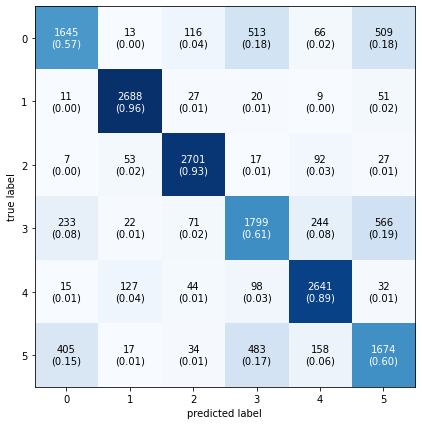

In [ ]:
#Matriz de confusion
cm_xgb = confusion_matrix(y_test_boost,preds_xgb)
plot_confusion_matrix(conf_mat=cm_xgb, show_normed=True, figsize=(7,7))

Tabla Comparativa

In [ ]:
modelos = ["SVM", "Random Forest", "XGBoost"]
ACC = [acc_svm, acc_rf, acc_xgb]
P = [precision_svm, precision_rf, precision_xgb]
R = [recall_svm, recall_rf, recall_xgb]
F1 = [f1_svm, f1_rf, f1_xgb]
AUC = [auc_svm, auc_rf, auc_xgb]
df_comparacion = pd.DataFrame(list(zip(modelos, ACC, P, R, F1, AUC)), 
               columns =['Modelos', 'ACC', 'P','R','F1','AUC']) 

In [ ]:
df_comparacion

,Modelos,ACC,P,R,F1,AUC
0,SVM,0.582946,0.578473,0.583625,0.568878,0.856058
1,Random Forest,0.690562,0.693683,0.690154,0.688056,0.927009
2,XGBoost,0.763176,0.759253,0.762543,0.759340,0.946780


###Entrega 05 - Interpret

**Descripción de los resultados**

En relación a los resultados, el modelo construido con el método XGBoost  presenta los mejores resultados en las métricas, en todos los casos, superan el 75%, mientras que, la métrica AUC (área bajo la curva ROC), es de 94%, dando a conocer que tiene un excelente rendimiento. El modelo usando el método SVM tiene los menores resultados en las métricas, en comparación a los demás modelos. 

Sin embargo, ninguno de los modelos superan el 95% en las métricas, como lo propone la hipótesis. Esto es, probablemente por factores, como la selección de los datos a usar para el entrenamiento y testing o el no usar hiperparámetros adecuados para mejorar el entrenamiento del modelo. Hubiera sido mejor, desde mi punto de vista, volver a analizar el conjunto de datos balanceados para buscar nuevas características que puedan ser útiles para la clasificación y generar un conjunto de datos más pequeño con otra clase de método. 

En cuanto a la matriz de confusión, en todos los modelos, se tiene que la mayor cantidad de predicciones correctas es para la etiqueta 1, que corresponde a la actividad "Lying Down", seguido por la etiqueta 2, que corresponde a "Sitting" y en tercer lugar se encuentra la etiqueta 4 con la actividad "Standing". Se puede decir, que los modelos tienen una mayor precisión para predecir actividades con menor movimiento.


**Conclusiones**

Para conseguir mejores resultados en las métricas de los modelos es necesario volver a analizar en profundidad los datos para obtener otras características que puedan ser útiles en la clasificación, así como, diferenciar entre las actividades de menor y mayor movimiento. Asimismo, dedido a las limitaciones de Google Colab, en relación a la capacidad de procesamiento, se usó un conjunto pequeño de datos para el entrenamiento y testing, lo que pudo perjudicar el rendimiento de los modelos, en ese caso, hubiera sido buena idea trabajar en local para tener una más capacidad de cómputo.